In [129]:
import numpy as np
import pandas as pd


In [130]:
import string
from nltk.corpus import stopwords

# Assuming you're using NLTK for stopwords
# Download stopwords if you haven't already
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [131]:
import pandas as pd

df = pd.read_csv("spam.csv", encoding='latin1')


In [132]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [133]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [134]:
df.drop(columns =['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [135]:
df.sample(5)

,v1,v2
3511,ham,Already one guy loving you:-.
1582,ham,"Yep, at derek's house now, see you Sunday &lt;3"
4988,ham,So your telling me I coulda been your real Val...
4206,ham,"Lets use it next week, princess :)"
3357,ham,I don't run away frm u... I walk slowly &amp; ...


In [136]:
df.rename(columns ={'v1' :'target','v2':'text'}, inplace = True)

In [137]:
df.sample(5)

,target,text
1804,ham,The bus leaves at &lt;#&gt;
4493,ham,Man this bus is so so so slow. I think you're ...
4291,ham,G.W.R
2023,ham,Is there any movie theatre i can go to and wat...
5052,ham,Lmao you know me so well...


In [138]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

In [139]:
df['target'] = encoder.fit_transform(df['target'])

In [140]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [141]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [142]:
df.duplicated().sum()

403

In [143]:
df = df.drop_duplicates(keep ='first')

In [144]:
df.shape

(5169, 2)

In [145]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

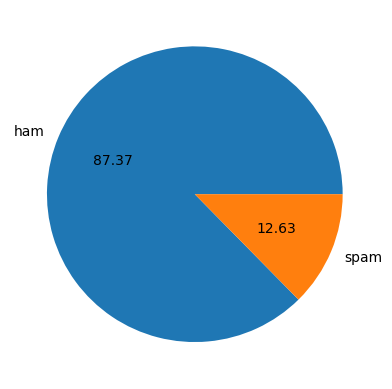

In [146]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = '%0.2f')
plt.show()


In [147]:

import nltk

In [148]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [149]:
df['num_characters']= df['text'].apply(len)

In [150]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [151]:
df['num_words'] = df['text'].apply(lambda x :len(nltk.word_tokenize(x)))

In [152]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [153]:
df['num_sentence'] = df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))

In [154]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

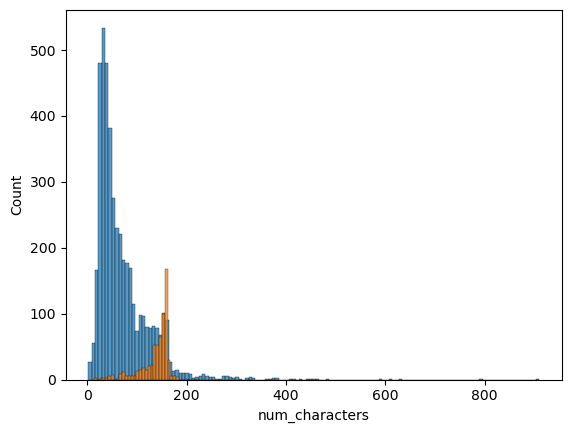

In [155]:
import seaborn as sns
sns.histplot(df[df['target'] ==0]['num_characters'])
sns.histplot(df[df['target'] ==1]['num_characters'])

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


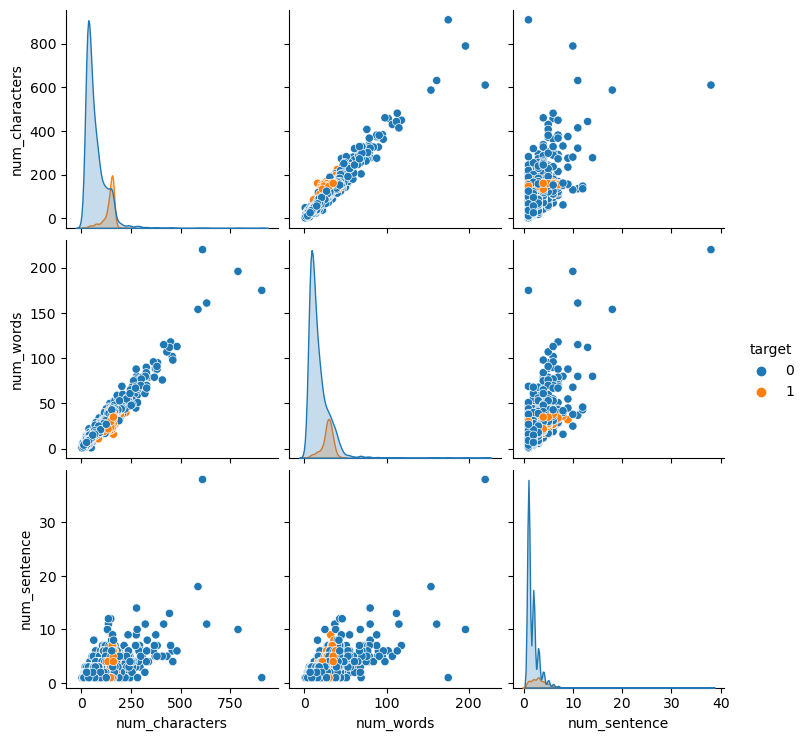

In [156]:
sns.pairplot(df,hue ='target')

<Axes: >

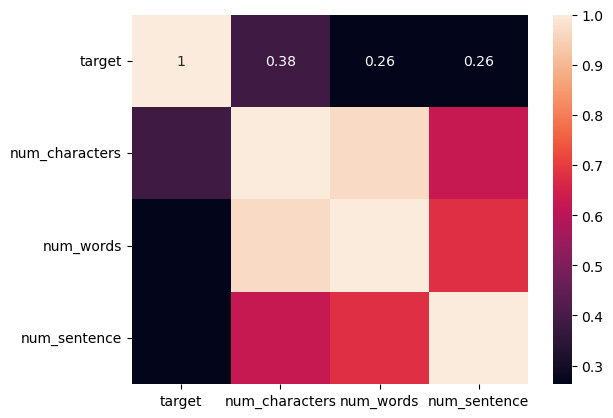

In [157]:
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True)

In [162]:

import string  # Import the string module
from nltk.stem import PorterStemmer

ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text :
        y.append(ps.stem(i))
    return " ".join(y)




In [163]:
df['transformed_text'] = df['text'].apply(transform_text)

In [164]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [165]:
from wordcloud import WordCloud 
wc = WordCloud(width = 500, height = 500 , min_font_size = 10 , background_color ='white')

In [166]:
spam_Wc = wc.generate(df[df['target'] ==1 ]['transformed_text'].str.cat(sep = " "))

In [167]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


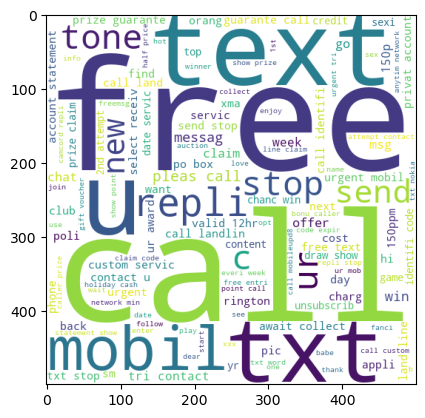

In [168]:
plt.imshow(spam_Wc)

In [169]:
ham_Wc = wc.generate(df[df['target'] ==0 ]['transformed_text'].str.cat(sep = " "))

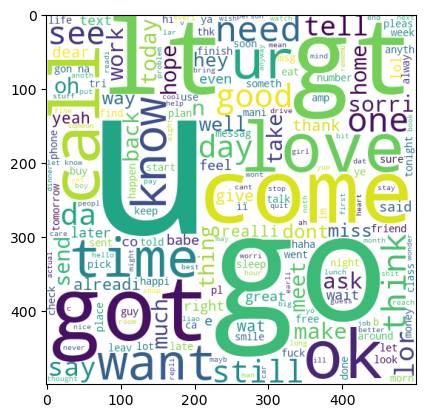

In [170]:
plt.imshow(ham_Wc)

In [171]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
     for word in msg.split():
         spam_corpus.append(word)

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


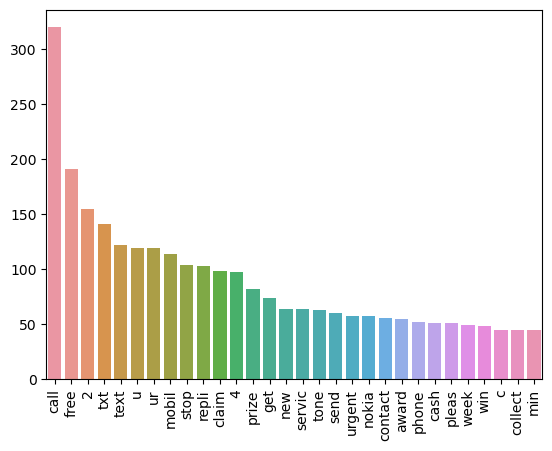

In [172]:
from collections import Counter 
word_counts = Counter(spam_corpus).most_common(30)
words = [word[0] for word in word_counts]
counts = [count[1] for count in word_counts]

sns.barplot(x=words, y=counts)
plt.xticks(rotation='vertical')  # Corrected typo
plt.show()                                                                  

In [173]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf =TfidfVectorizer()


In [174]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [175]:
X.shape

(5169, 6708)

In [176]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [177]:
from sklearn.model_selection import train_test_split 


In [178]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [179]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [180]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [181]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
      

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [182]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
      

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [183]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [184]:
#tfidf -----> mnb

In [185]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))


In [186]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  # Add this import

# Assuming you're using NLTK for stopwords
# Download stopwords if you haven't already
import nltk
nltk.download('stopwords')

# Create a stemmer object
ps = PorterStemmer()

def transform_text(text):
    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))  # Using the stemmer object
    return " ".join(y)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
